In [1]:
import matplotlib
%matplotlib inline

In [2]:
#imports 
from dataclasses import dataclass
from matplotlib.animation import FuncAnimation, FFMpegWriter
import numpy as np
import matplotlib.pyplot as plt

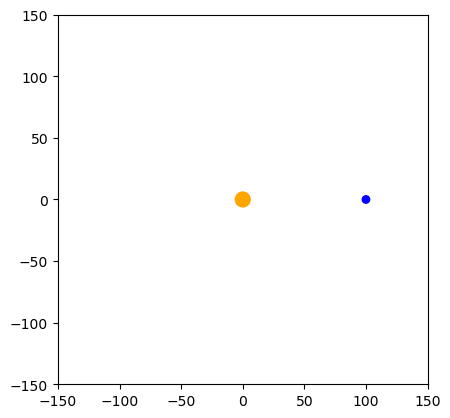

In [3]:
@dataclass
class CelestialBody:
    name: str
    mass: np.float64
    position: np.ndarray
    velocity: np.ndarray
bodies = np.array([
    CelestialBody(name='Earth', mass=np.float32(1.0), position=np.array([100.0, 0], dtype=np.float32), velocity=np.array([0, 1], dtype=np.float32)),
    CelestialBody(name='Sun', mass=np.float32(1000.0), position=np.array([0, 0], dtype=np.float32) , velocity=np.array([0, 0], dtype=np.float32))
], dtype=object)
def calculate_orbit(body1: CelestialBody, body2: CelestialBody) -> np.ndarray:
    """
    Calcula la fuerza gravitacional entre dos cuerpos celestes.
    """
    radial_vector = body2.position - body1.position
    G = 6.67
    distance = np.linalg.norm(body1.position - body2.position)
    force = G * (body1.mass * body2.mass) / (distance ** 2)
    force_vector = radial_vector / distance * force
    return force_vector
def update_position(body: CelestialBody, force: np.ndarray, dt: float) -> None:
    """
    Actualiza la posición de un cuerpo celeste en función de la fuerza ejercida sobre él.
    """
    acceleration = force / body.mass
    body.velocity += acceleration * dt  # Actualizamos la velocidad
    body.position += body.velocity * dt
# Dibujar la trayectoria de los cuerpos celestes
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-150, 150)
ax.set_ylim(-150, 150)

# Dibujar los cuerpos celestes
planet = plt.Circle((bodies[0].position[0], bodies[0].position[1]), radius=3, color='blue')
star = plt.Circle((bodies[1].position[0], bodies[1].position[1]), radius=6, color='orange')
ax.add_patch(star)
ax.add_patch(planet)

# Inicializar la trayectoria
trajectory_x = []
trajectory_y = []
path, = ax.plot([], [], 'k--', lw=0.5)

def update(frame):
    """
    Actualiza la posición de los cuerpos celestes en cada fotograma.
    """
    global trajectory_x, trajectory_y

    # Calcular la fuerza gravitacional y actualizar la posición
    force = calculate_orbit(bodies[0], bodies[1])
    update_position(bodies[0], force, dt=0.1)

    # Actualizar la posición del planeta
    planet.center = (bodies[0].position[0], bodies[0].position[1])

    # Acumular la trayectoria
    trajectory_x.append(bodies[0].position[0])
    trajectory_y.append(bodies[0].position[1])
    path.set_data(trajectory_x, trajectory_y)

    return planet, path

ani = FuncAnimation(fig, update, frames=100, interval=30)
plt.show()